# Домашня робота №9

# Незалежність та некорельованість
На цьому занятті ми розглянемо випадкові вектори, складені з випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Класи для 3D графіків

In [2]:
# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
# %matplotlib notebook

## 2 Багатовимірний нормальний розподіл

Випадкова величина $\zeta$ має $k$-вимірний нормальний розподіл з вектором середніх $\mu$ та матрицею коваріацій $\Sigma$,
тобто $\zeta \sim N_k(\mu, \Sigma)$,
якщо її щільність дорівнює:
$$f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp \left\{ -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right\}.$$

Детальна інформація про клас `multivariate_normal` в [документації](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.multivariate_normal.html).

In [3]:
from scipy.stats import multivariate_normal


def plot_multivariate_normal(mu, cov, x, y):
    zeta = multivariate_normal(mean=mu, cov=cov)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    Z = zeta.pdf(pos)
    
    # Prepare the figure.
    fig = plt.figure(figsize=(20, 6))

    # Plot the surface.
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Add contour plot of the surface.
    ax2 = fig.add_subplot(122)
    cont = ax2.contourf(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(cont)
    plt.show()

### 2.1 Зміна матриці коваріацій

#### 2.1.1 Завдання 2.1.1

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 0 \\ 0\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.$$

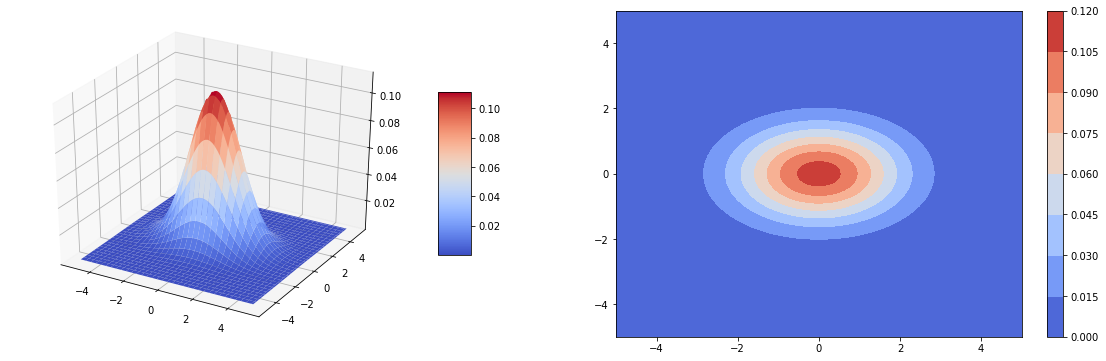

In [4]:
mu = [0, 0]
cov = [[2, 0],
       [0, 1]]

plot_multivariate_normal(mu, cov, np.arange(-5, 5.1, 0.1), np.arange(-5, 5.1, 0.1))



#### 2.1.2 Завдання 2.1.2

Зобразіть графік поверхні та контурний графік функції щільності $2$-вимірного нормального розподілу з параметрами
$$\mu = \begin{bmatrix} 1 \\ -1\end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}.$$

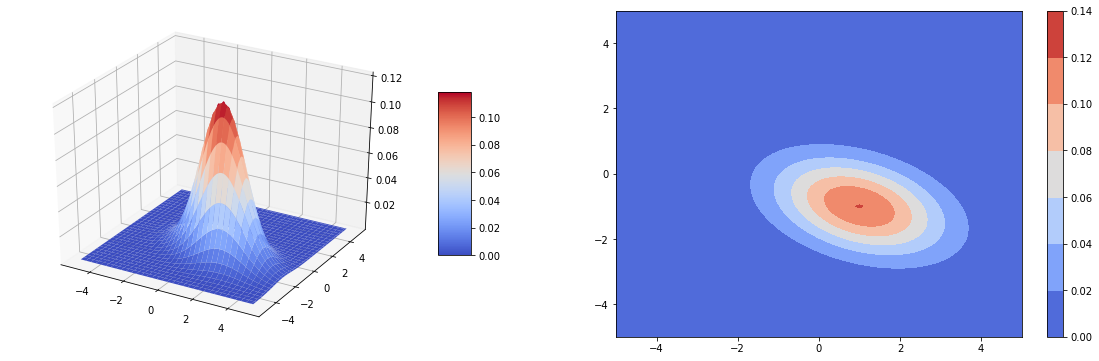

In [5]:
# Місце для Вашого коду

mu = [1, -1]
cov = [[2, -0.5],
       [-0.5, 1]]

plot_multivariate_normal(mu, cov, np.arange(-5, 5.1, 0.1), np.arange(-5, 5.1, 0.1))


## 3 Некорельованість не означає незалежність

### 3.1 Задача 1.16.13

Нехай $Z = X Y$, де $X \sim N(0, 1)$ не залежить від $Y$ і $P(Y = 1) = P(Y = -1) = \frac{1}{2}$.
Покажіть, що $Z \sim N(0, 1)$ і що $X$ та $Z$ некорельовані, але залежні.
Знайдіть розподіл пар $(X, Z)$ та $(Y, Z)$, а також розподіл $X + Z$.

1. Згенеруйте $n = 100000$ значень випадкових величин $X, Y$;
2. Отримайте $n = 100000$ значень випадкової величини $Z$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $Z$;
   - функцію щільності випадкової величини $Z$.
4. Виведіть матрицю коваріацій між значеннями випадкових величин $X$ та $Z$.
5. Для значень $X$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $Y$ та $Z$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Зобразіть на графіку:
   - нормовану гістограму $n = 100000$ значень випадкової величини $X+Z$;
   - функцію щільності випадкової величини $X+Z$.

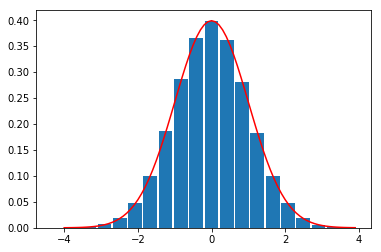

Cov matrix:
 [[0.9997265  0.00162816]
 [0.00162816 0.999707  ]]


In [6]:
from scipy.stats import bernoulli, norm

n = 100000

X = norm(0, 1)
X_rvs = X.rvs(size=n)

Y = bernoulli(p=0.5)
Y_rvs = Y.rvs(size=n)*2 - 1

Z_rvs = X_rvs * Y_rvs

t = np.arange(-4, 4, 0.1)
plt.hist(Z_rvs, density=True, rwidth=0.9, bins=20)
plt.plot(t, X.pdf(t), 'r')
plt.show()


cov_mtrx = np.cov(X_rvs, Z_rvs)
print("Cov matrix:\n", cov_mtrx)


def hist_and_contour(x, y, x_range, y_range):
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132)
    
    # Compute the bi-dimensional histogram
    n_bins = 24
#     x_range = [-3, 3]
#     y_range = [-3, 3]
    xy_range = [x_range, y_range]
    hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins, range=xy_range)

    # Construct arrays for the anchor positions of the bars.
    xpos1, ypos1 = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
    xpos = xpos1.ravel()
    ypos = ypos1.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the bars.
    dx = dy = 0.2 * np.ones_like(zpos)
    dz = hist.ravel()
    x_length = (x_range[1] - x_range[0]) / n_bins
    y_length = (y_range[1] - y_range[0]) / n_bins
    dz_normed = dz / (n * x_length * y_length)

    # Make color map with 8 colors
    colors = cm.get_cmap('viridis', 8)

    # Plot 3D histogram
    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

    # Add color bar
    colourMap = plt.cm.ScalarMappable(cmap=colors)
    colourMap.set_array(dz_normed)
    colBar = plt.colorbar(colourMap)

    # Make contour plot
    normed_hist = hist / (n * x_length * y_length)
    ax2.contourf(xpos1, ypos1, normed_hist, cmap=colors)

    ax3 = fig.add_subplot(133)
    ax3.axis(x_range + y_range)
    ax3.plot(x, y, 'o', markersize=0.1)
    
    plt.show()



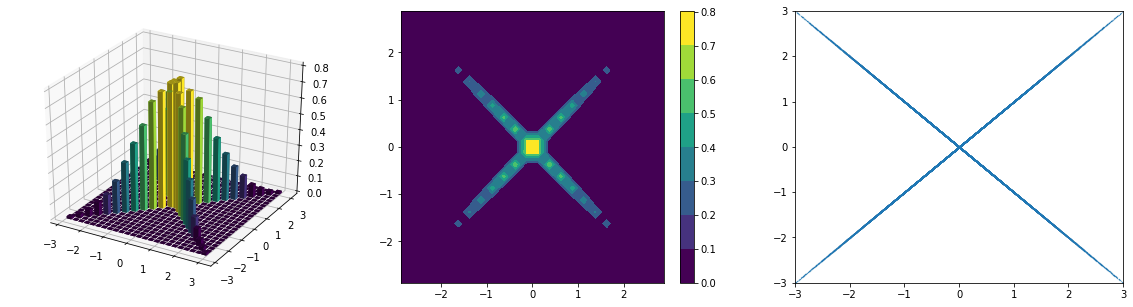

In [7]:
hist_and_contour(X_rvs, Z_rvs, [-3, 3], [-3, 3])

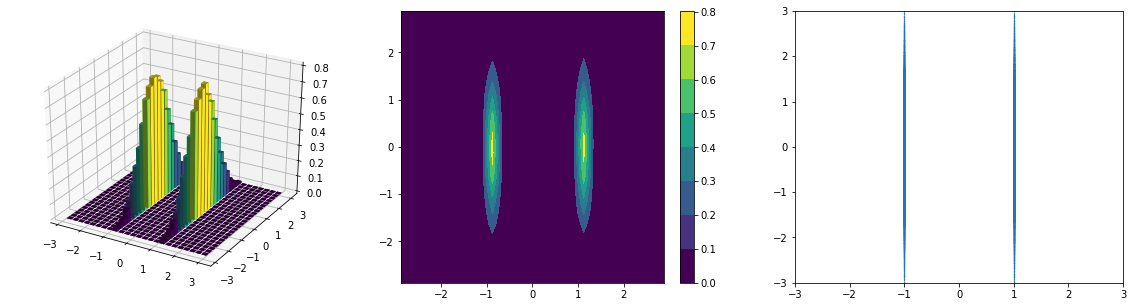

In [8]:
hist_and_contour(Y_rvs, Z_rvs, [-3, 3], [-3, 3])

## 4 Незалежність випадкових величин з Домашньої роботи №8

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= \frac{\xi_1}{\xi_1 + \xi_2} \sim Uniform(0, 1), \\
\zeta_2 &= \xi_1 + \xi_2 \sim \Gamma(2)
\end{aligned}
$$
незалежні.
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 100000$ значень випадкових величин $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.
5. Для значень двох незалежних випадкових величин $\eta_1 \sim Uniform(0, 1), \eta_2 \sim \Gamma(2)$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
7. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.

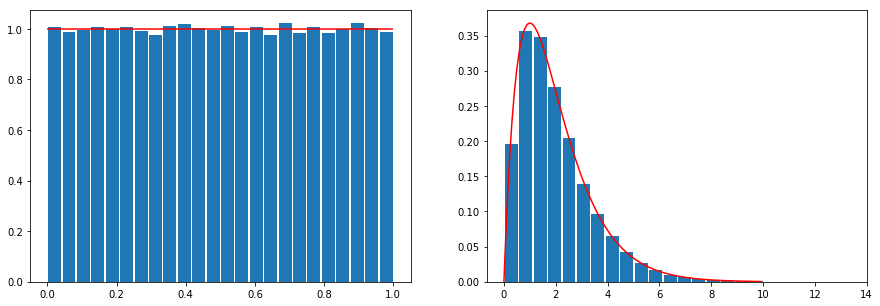

In [9]:
from scipy.stats import expon, gamma, uniform


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)

xi = expon(0, 1)

xi1_rvs = xi.rvs(size=n)
xi2_rvs = xi.rvs(size=n)

dzeta1_rvs = (xi1_rvs)/(xi1_rvs + xi2_rvs)
dzeta2_rvs = xi1_rvs + xi2_rvs

ax1.hist(dzeta1_rvs, density=True, rwidth=0.9, bins=24)
ax1.hlines(1, 0, 1, 'r')

t = np.arange(0, 10, 0.1)
ax2 = fig.add_subplot(122)
ax2.hist(dzeta2_rvs, density=True, rwidth=0.9, bins=24)
ax2.plot(t, gamma.pdf(t, 2), 'r')
plt.show()

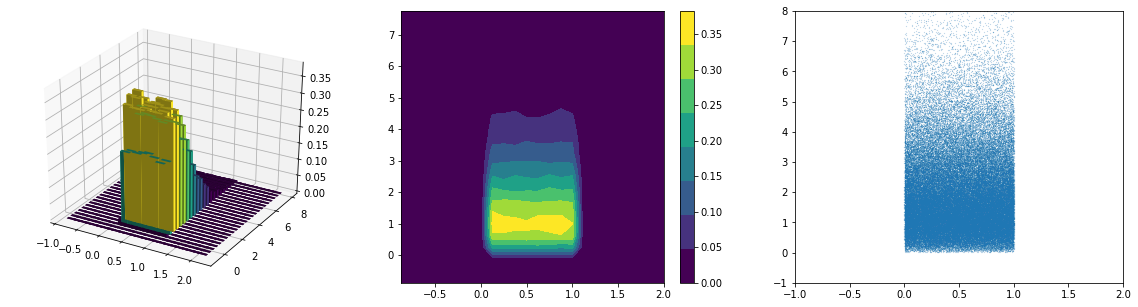

In [10]:
eta1_rvs = uniform.rvs(loc=0, scale=1, size=n)
eta2_rvs = gamma.rvs(a=2, loc=0, scale=1, size=n)

hist_and_contour(eta1_rvs, eta2_rvs, [-1, 2], [-1, 8])

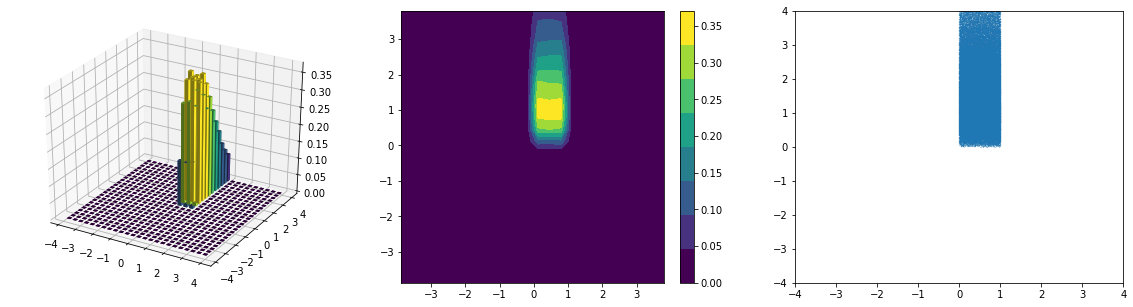

In [11]:
hist_and_contour(dzeta1_rvs, dzeta2_rvs, [-4, 4], [-4, 4])

In [12]:
from scipy.stats.mstats import pearsonr
from scipy.stats.mstats import spearmanr

print("Cov matrix:\n", np.cov(dzeta1_rvs, dzeta2_rvs), end='\n')
print("Pearson coeff:\n", pearsonr(dzeta1_rvs, dzeta2_rvs)[0], end='\n')
print("Spearman coeff:\n", spearmanr(dzeta1_rvs, dzeta2_rvs)[0], end='\n')

Cov matrix:
 [[8.32894153e-02 6.28875152e-04]
 [6.28875152e-04 2.00323046e+00]]
Pearson coeff:
 0.0015395864168029046
Spearman coeff:
 0.0006175120953857512


## 5 Генерування залежних випадкових величин

### 5.1 Нормальний розподіл

Нехай $\zeta = (\zeta_1, \zeta_2)^T \sim N_2(\textbf{0}, I)$, тобто $\zeta_1, \zeta_2 \sim N(0, 1)$ &mdash; незалежні,
$A$ &mdash; матриця $2 \times 2$, $m$ &mdash; вектор $2 \times 1$.
Тоді
$$A \zeta + m \sim N_2 (m, A A^T).$$

#### 5.1.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Згенеруйте випадковий вектор $\zeta = (\zeta_1, \zeta_2)$ з $2$-вимірного нормального розподілу з параметрами
$$
\mu = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \qquad
\Sigma = \begin{bmatrix} 2 & -0.5 \\ -0.5 & 1 \end{bmatrix}
$$
за допомогою лінійного перетворення випадкових величин $\xi_1, \xi_2$ та розкладу Холецького матриці $\Sigma$.

1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2 \sim N(0,1)$;
2. Отримайте $n = 100000$ значень $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

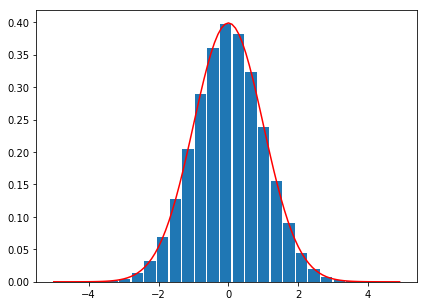

array([ 1.44480062, -0.05199767,  1.21817167, ...,  1.48793155,
        2.38587112,  1.0604225 ])

In [13]:
from scipy.stats import norm

n = 100_000

mu = np.matrix([[1], 
                [-1]])
cov = np.matrix([[2, -0.5], 
                [-0.5, 1]])

xi1_rvs = norm.rvs(loc=0, scale=1, size=n)
xi2_rvs = norm.rvs(loc=0, scale=1, size=n)

A = np.linalg.cholesky(cov).flat
a11, a12, a21, a22 = A

dzeta1_rvs = a11*xi1_rvs + mu.A[0][0]
dzeta2_rvs = a21*xi1_rvs + a22*xi2_rvs + mu.A[1][0]

t = np.arange(-5, 5, 0.1)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)

ax1.hist(xi1_rvs, density=True, rwidth=0.9, bins=24)
ax1.plot(t, norm.pdf(t, loc=0, scale=1), 'r')
plt.show()

dzeta1_rvs

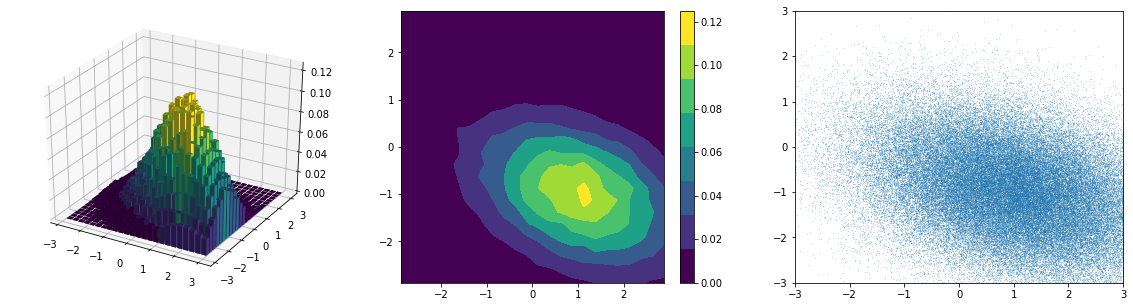

In [14]:
hist_and_contour(dzeta1_rvs, dzeta2_rvs, [-3, 3], [-3, 3])

In [15]:
print("Cov matrix:\n", np.cov(dzeta1_rvs, dzeta2_rvs), end='\n')
print("Pearson coeff:\n", pearsonr(dzeta1_rvs, dzeta2_rvs)[0], end='\n')
print("Spearman coeff:\n", spearmanr(dzeta1_rvs, dzeta2_rvs)[0], end='\n')

Cov matrix:
 [[ 1.99231259 -0.50510871]
 [-0.50510871  1.00690046]]
Pearson coeff:
 -0.35662587045735217
Spearman coeff:
 -0.34274617707767063


### 5.2 Експоненційний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.2.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $u_1, u_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $u_1, u_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Тоді
$$
\begin{aligned}
\xi_1 &= F^{-1}(u_1) \sim Exp(1), \\
\xi_2 &= F^{-1}(u_2) \sim Exp(1), \\
\xi_1^a &= F^{-1}(1-u_1) \sim Exp(1), \\
\xi_2^a &= F^{-1}(1-u_2) \sim Exp(1),
\end{aligned}
$$
де $F$ &mdash; функція розподілу стандартного експоненційного розподілу.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= (1 - p) \xi_1 + \eta_1 \xi_2 \sim Exp(1), \\
\zeta_2 &= (1 - p) \xi_2^a + \eta_2 \xi_1^a \sim Exp(1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&2 p (1 - p)(-0.6449) - (1 - p)^2, & p \geq 1/2, \\
&2 p (1 - p)(-0.6449) - p^2, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $u_1, u_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\xi_1, \xi_2, \xi_1^a, \xi_2^a, \zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1^a$;
   - функцію щільності випадкової величини $\xi_1^a$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2^a$;
   - функцію щільності випадкової величини $\xi_2^a$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

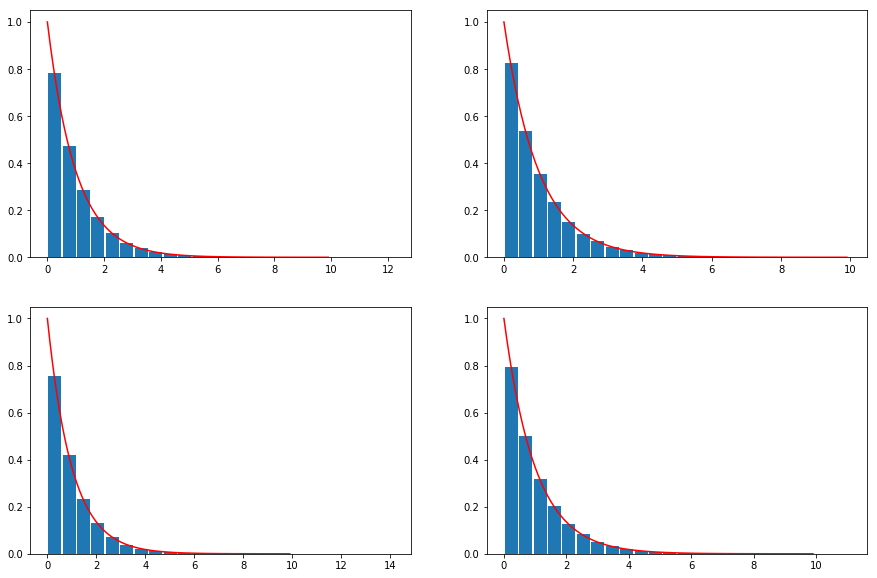

In [16]:
from scipy.stats import expon

n = 100_000
p = 0.5

F = expon(0, 1).ppf

u1 = uniform(0, 1).rvs(size=n)
u2 = uniform(0, 1).rvs(size=n)
eta1 = bernoulli(p).rvs(size=n)
eta2 = bernoulli(p).rvs(size=n)

xi1 = F(u1)
xi2 = F(u2)
xi1_alpha = F(1 - u1)
xi2_alpha = F(1 - u2)

fig = plt.figure(figsize=(15, 10))
t = np.arange(0, 10, 0.1)

ax1 = fig.add_subplot(221)
ax1.hist(xi1, density=True, rwidth=0.9, bins=24)
ax1.plot(t, expon(0, 1).pdf(t), 'r')

ax2 = fig.add_subplot(222)
ax2.hist(xi2, density=True, rwidth=0.9, bins=24)
ax2.plot(t, expon(0, 1).pdf(t), 'r')

ax3 = fig.add_subplot(223)
ax3.hist(xi1_alpha, density=True, rwidth=0.9, bins=24)
ax3.plot(t, expon(0, 1).pdf(t), 'r')

ax4 = fig.add_subplot(224)
ax4.hist(xi2_alpha, density=True, rwidth=0.9, bins=24)
ax4.plot(t, expon(0, 1).pdf(t), 'r')

plt.show()

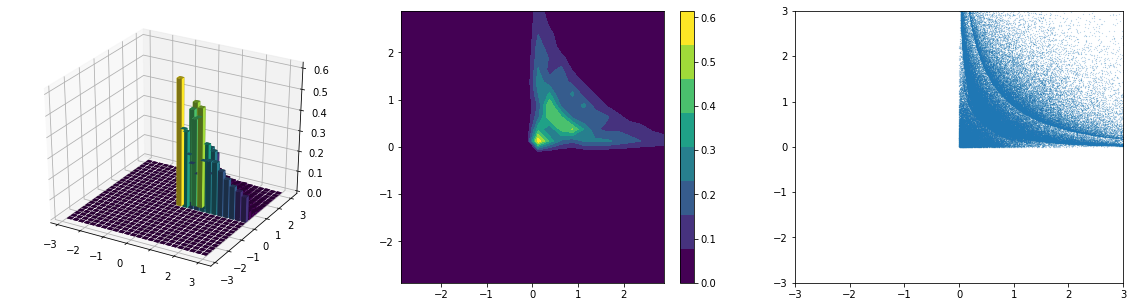

In [17]:
dzeta1 = (1 - p)*xi1 + eta1*xi2
dzeta2 = (1 - p)*xi2_alpha + eta2*xi1_alpha

hist_and_contour(dzeta1, dzeta2, [-3, 3], [-3, 3])

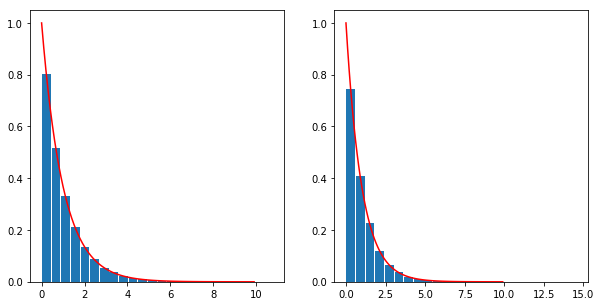

In [18]:
fig = plt.figure(figsize=(10, 5))
t = np.arange(0, 10, 0.1)

ax1 = fig.add_subplot(121)
ax1.hist(dzeta1, density=True, rwidth=0.9, bins=24)
ax1.plot(t, expon(0, 1).pdf(t), 'r')

ax2 = fig.add_subplot(122)
ax2.hist(dzeta2, density=True, rwidth=0.9, bins=24)
ax2.plot(t, expon(0, 1).pdf(t), 'r')

plt.show()

In [21]:
def corr1(p):
    if p >= 0.5:
        return 2*p*(1 - p)*(-0.65) - (1 - p)**2
    else:
        return 2*p*(1 - p)*(-0.65)- p**2
        
print(f"Theoretical correltaion: {corr1(p)}")
print("Cov matrix:\n", np.cov(dzeta1, dzeta2), end='\n')
print("Pearson coeff:\n", pearsonr(dzeta1, dzeta2)[0], end='\n')
print("Spearman coeff:\n", spearmanr(dzeta1, dzeta2)[0], end='\n')

Theoretical correltaion: -0.575
Cov matrix:
 [[ 0.99835404 -0.31944787]
 [-0.31944787  0.99322979]]
Pearson coeff:
 -0.32079887680579644
Spearman coeff:
 -0.3855403765963661


### 5.3 Рівномірний розподіл

За метеріалами статті

*A. J. Lawrance, P. A. W. Lewis.
“Simple Dependent Pairs of Exponential and Uniform Random Variables.”
Operations Research, vol. 31, no. 6, 1983, pp. 1179–1197.*

Оригінал статті дивіться в прикріпленому файлі [lab_9_paper.pdf](https://github.com/Slavastas119/Probability-Theory-2-year-students/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D1%82%D1%8F%209/lab_9_paper.pdf)
або [за посиланням](https://pdfs.semanticscholar.org/1ceb/fbbe20644a4e9d3a6eaa3698777a8b0169a6.pdf).

#### 5.3.1 Від'ємна кореляція

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу
та незалежні від них, але залежні між собою, випадкові величини $\eta_1, \eta_2$ з розподілу Бернуллі з параметром $p$.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1), \eta_1, \eta_2 \sim Bernoulli(p)$.

Випадкові величини $\eta_1, \eta_2$ залежні таким чином:
$$
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 0, \\
P(\eta_1 = 0, \eta_2 = 1) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 0) &= 1 - p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 2 p - 1,
\end{aligned}
\right.
\quad p \geq 1/2, \qquad \qquad
\left\{
\begin{aligned}
P(\eta_1 = 0, \eta_2 = 0) &= 1 - 2 p, \\
P(\eta_1 = 0, \eta_2 = 1) &= p, \\
P(\eta_1 = 1, \eta_2 = 0) &= p, \\
P(\eta_1 = 1, \eta_2 = 1) &= 0,
\end{aligned}
\right.
\quad p \leq 1/2.
$$

Тоді випадкові величини
$$
\begin{aligned}
\zeta_1 &= 1 - \xi_1^{(1 - p)} \xi_2^{\eta_1} \sim Uniform(0, 1), \\
\zeta_2 &= 1 - (1-\xi_2)^{(1 - p)} (1-\xi_1)^{\eta_2} \sim Uniform(0, 1)
\end{aligned}
$$
залежні та мають коефіцієнт кореляції
$$
Corr(\zeta_1, \zeta_2) =
\left\{
\begin{aligned}
&\frac{-3 (1-p) (4 + 5(1-p) + 6(1-p)^2 + (1-p)^3)}{(2-p)^2 (3-p)^2}, & p \geq 1/2, \\
&\frac{-3 p (2 + 3(1-p) - (1-p)^2)}{(2-p)^2 (3-p)}, & p \leq 1/2.
\end{aligned}
\right.
$$

Для параметра $p = 0.5$
1. Згенеруйте $n = 100000$ значень випадкових величин $\xi_1, \xi_2, \eta_1, \eta_2$;
2. Отримайте $n = 100000$ значень $\zeta_1, \zeta_2$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_1$;
   - функцію щільності випадкової величини $\xi_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi_2$;
   - функцію щільності випадкової величини $\xi_2$.
5. Для значень $\zeta_1$ та $\zeta_2$ побудуйте:
   - нормовану 3D гістограму;
   - контурний графік;
   - діаграму розсіювання.
6. Виведіть теоретичну кореляцію, матрицю коваріацій, кореляції Пірсона та Спірмена між значеннями випадкових величин $\zeta_1$ та $\zeta_2$.
7. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
8. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

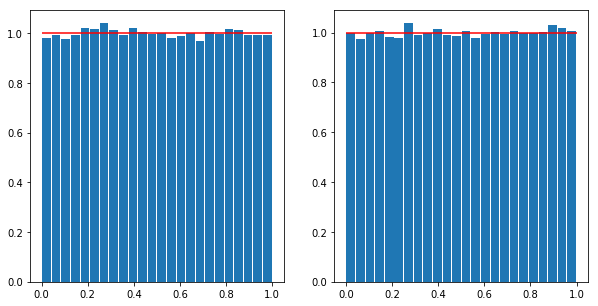

In [25]:
n = 100_000
p = 0.5

xi1 = uniform(0, 1).rvs(size=n)
xi2 = uniform(0, 1).rvs(size=n)
eta1 = bernoulli(p).rvs(size=n)
eta2 = bernoulli(p).rvs(size=n)

dzeta1 = 1 - xi1**(1 - p)*xi2**eta1
dzeta2 - 1 - (1 - xi2)**(1 - p)*(1 - xi1)**eta2

fig = plt.figure(figsize=(10, 5))
t = np.arange(0, 10, 0.1)

ax1 = fig.add_subplot(121)
ax1.hist(xi1, density=True, rwidth=0.9, bins=24)
ax1.hlines(1, 0, 1, 'r')

ax2 = fig.add_subplot(122)
ax2.hist(xi2, density=True, rwidth=0.9, bins=24)
ax2.hlines(1, 0, 1, 'r')

plt.show()

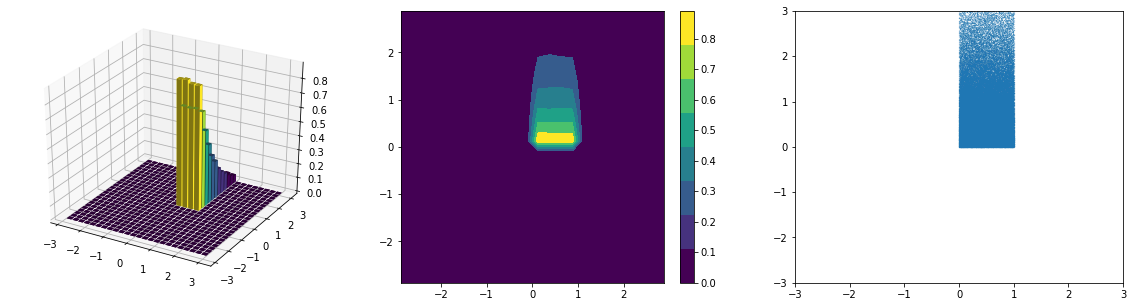

In [26]:
hist_and_contour(dzeta1, dzeta2, [-3, 3], [-3, 3])

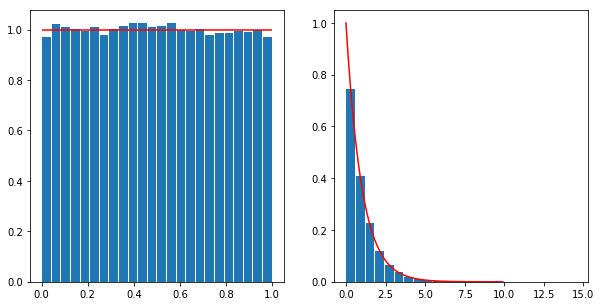

In [27]:
fig = plt.figure(figsize=(10, 5))
t = np.arange(0, 10, 0.1)

ax1 = fig.add_subplot(121)
ax1.hist(dzeta1, density=True, rwidth=0.9, bins=24)
ax1.hlines(1, 0, 1, 'r')

ax2 = fig.add_subplot(122)
ax2.hist(dzeta2, density=True, rwidth=0.9, bins=24)
ax2.plot(t, expon(0, 1).pdf(t), 'r')

plt.show()

In [28]:
def corr2(p):
    if p > 0.5:
        return -3*(1 - p)*(4 + 5*(1 - p) + 6*(1 - p**2) + (1-p)**3) / ((2 - p)**2 * (3 - p))
    else:
        return  (-3*p*(2 + 3*(1 - p) - (1 - p)**2)) / ((2 - p)**2 *(3 - p))
    

print(f"Theoretical correltaion: {corr2(p)}")
print("Cov matrix:\n", np.cov(dzeta1, dzeta2), end='\n')
print("Pearson coeff:\n", pearsonr(dzeta1, dzeta2)[0], end='\n')
print("Spearman coeff:\n", spearmanr(dzeta1, dzeta2)[0], end='\n')

Theoretical correltaion: -0.8666666666666667
Cov matrix:
 [[ 8.26768757e-02 -5.82681749e-04]
 [-5.82681749e-04  9.93229789e-01]]
Pearson coeff:
 -0.0020333611366826357
Spearman coeff:
 0.0005893761087109377
